In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import Normalize

<h1 style="color:rgb(203, 56, 233)">Data Preparation</h1>

In [10]:
df = pd.read_csv('./Superstore.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [13]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [14]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [20]:
# the data looks clean and no missing values or duplicates
# but the two date columns are object type
# we need to convert them to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [21]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [65]:
#need to the time range of our data
#let us extract months, year from order date column 

df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year.astype(str)


In [66]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015


<h1 style="color:rgb(203, 56, 233)">EDA</h1>

In [67]:
#first let us investigate which category has more sold parts (quantities)
sold_parts = df.groupby('Category').agg({'Quantity': 'sum'}).reset_index()

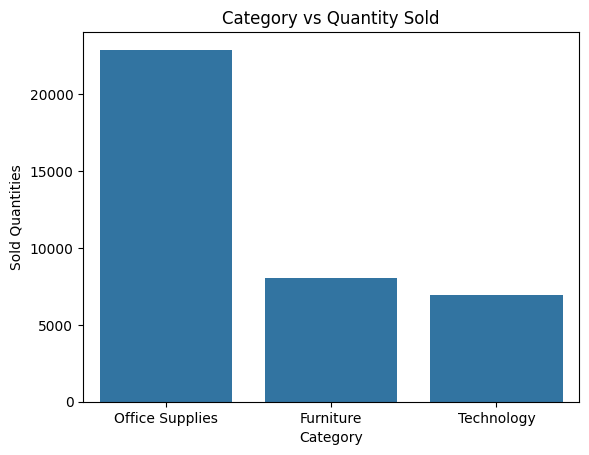

In [68]:
sns.barplot(sold_parts.sort_values('Quantity', ascending=False), x= 'Category', y='Quantity', )
plt.xlabel('Category')
plt.ylabel('Sold Quantities')
plt.title('Category vs Quantity Sold')
plt.show()

Office supplies category has most sold quantities.
let's investigate more

In [69]:
category_sales_profit = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
print(category_sales_profit)

          Category        Sales       Profit
0        Furniture  741999.7953   18451.2728
1  Office Supplies  719047.0320  122490.8008
2       Technology  836154.0330  145454.9481


In [70]:
#wide to long format
long_sales_profit = pd.melt(category_sales_profit, id_vars= 'Category', value_vars=['Sales', 'Profit'], var_name= 'Metric', value_name='Value')
print(long_sales_profit)

          Category  Metric        Value
0        Furniture   Sales  741999.7953
1  Office Supplies   Sales  719047.0320
2       Technology   Sales  836154.0330
3        Furniture  Profit   18451.2728
4  Office Supplies  Profit  122490.8008
5       Technology  Profit  145454.9481


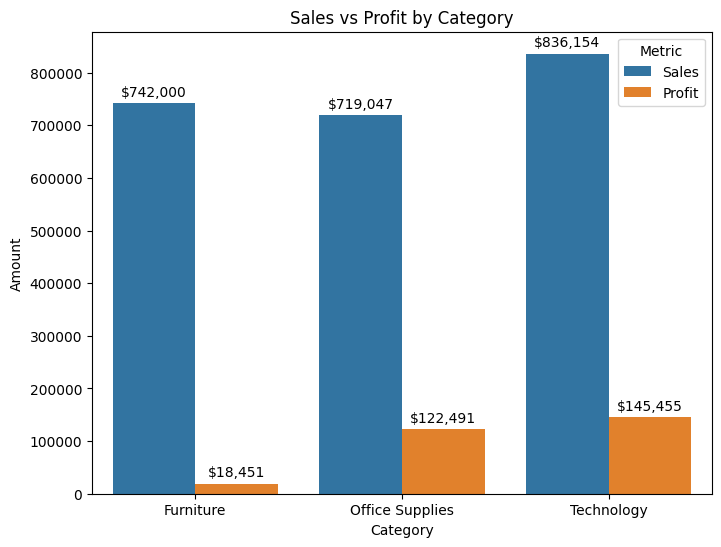

In [71]:
plt.figure(figsize=(8,6))

ax = sns.barplot(
    data=long_sales_profit,
    x='Category',
    y='Value',
    hue='Metric'
)

def value_currency(value):
    return f"${value:,.00f}"

for container in ax.containers:
    labels = [value_currency(bar.get_height()) for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding=3)

plt.title('Sales vs Profit by Category')
plt.ylabel('Amount')
plt.show()

unlike the expected office supplies has more much quantities sold but less sales than the others but the second most achieving profits.</br>
technology has most sales and profit

In [72]:
#how each category profit perform over the years
profit_years = df.groupby(['Category', 'Order Year']).agg({'Profit': 'sum'}).reset_index()
print(profit_years)

           Category Order Year      Profit
0         Furniture       2014   5457.7255
1         Furniture       2015   3015.2029
2         Furniture       2016   6959.9531
3         Furniture       2017   3018.3913
4   Office Supplies       2014  22593.4161
5   Office Supplies       2015  25099.5338
6   Office Supplies       2016  35061.2292
7   Office Supplies       2017  39736.6217
8        Technology       2014  21492.8325
9        Technology       2015  33503.8670
10       Technology       2016  39773.9920
11       Technology       2017  50684.2566


In [73]:
#how each category Sales perform over the years
sales_years = df.groupby(['Category', 'Order Year']).agg({'Sales': 'sum'}).reset_index()
print(sales_years)

           Category Order Year        Sales
0         Furniture       2014  157192.8531
1         Furniture       2015  170518.2370
2         Furniture       2016  198901.4360
3         Furniture       2017  215387.2692
4   Office Supplies       2014  151776.4120
5   Office Supplies       2015  137233.4630
6   Office Supplies       2016  183939.9820
7   Office Supplies       2017  246097.1750
8        Technology       2014  175278.2330
9        Technology       2015  162780.8090
10       Technology       2016  226364.1800
11       Technology       2017  271730.8110


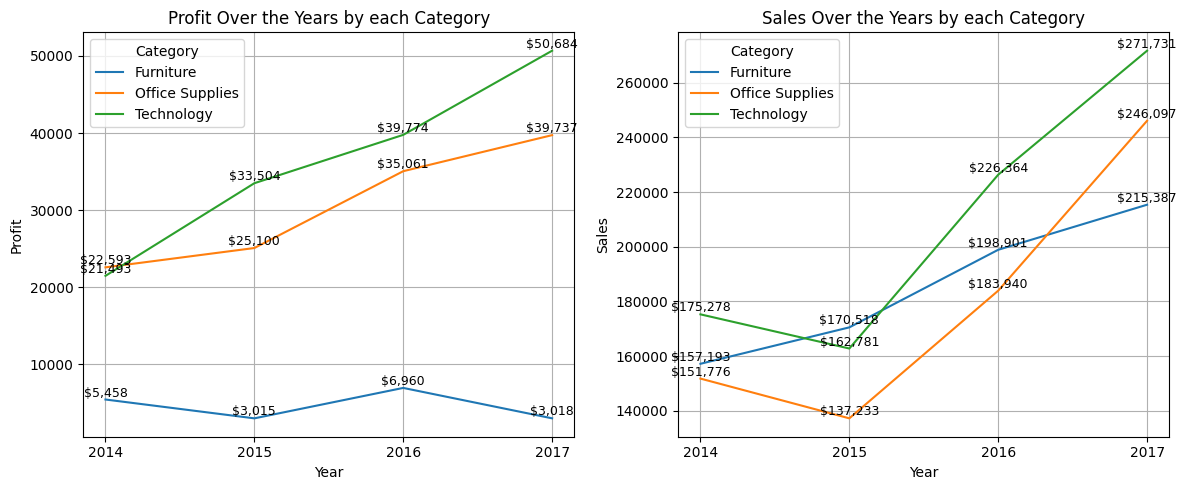

In [74]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharex=True)
sns.lineplot(
        data= profit_years,
        x='Order Year',
        y='Profit',
        hue='Category',
        markers='o',
        ax=axes[0]
)
sns.lineplot(
        data= sales_years,
        x='Order Year',
        y='Sales',
        hue='Category',
        markers='o',
        ax=axes[1]
)

for line in profit_years.groupby('Category'):
    category, group = line
    for i, row in group.iterrows():
        axes[0].text(row['Order Year'], row['Profit'] + 0.1 , value_currency(row['Profit']), ha="center", va="bottom", fontsize= 9)

for line in sales_years.groupby('Category'):
    category, group = line
    for i, row in group.iterrows():
        axes[1].text(row['Order Year'], row['Sales'] + 0.1 , value_currency(row['Sales']), ha="center", va="bottom", fontsize= 9)

axes[0].set_title('Profit Over the Years by each Category')
axes[0].set_xlabel('Year')
axes[0].grid(True)

axes[1].set_title('Sales Over the Years by each Category')
axes[1].set_xlabel('Year')
axes[1].grid(True)
plt.tight_layout()
plt.show()

even with furniture achieving in some way high sales, it does not reflect so much profit contrary to the two other categories.

In [136]:
#investigating each sub-category profit performance 
subcategory_profit = df.groupby(['Category', 'Sub-Category']).agg({'Profit': 'mean'}).reset_index()
print(subcategory_profit)

           Category Sub-Category      Profit
0         Furniture    Bookcases  -15.230509
1         Furniture       Chairs   43.095894
2         Furniture  Furnishings   13.645918
3         Furniture       Tables  -55.565771
4   Office Supplies   Appliances   38.922758
5   Office Supplies          Art    8.200737
6   Office Supplies      Binders   19.843574
7   Office Supplies    Envelopes   27.418019
8   Office Supplies    Fasteners    4.375660
9   Office Supplies       Labels   15.236962
10  Office Supplies        Paper   24.856620
11  Office Supplies      Storage   25.152277
12  Office Supplies     Supplies   -6.258418
13       Technology  Accessories   54.111788
14       Technology      Copiers  817.909190
15       Technology     Machines   29.432669
16       Technology       Phones   50.073938


In [137]:
#investigating each sub-category Sales amount 
subcategory_sales = df.groupby(['Category', 'Sub-Category']).agg({'Sales': 'mean'}).reset_index()
print(subcategory_sales)

           Category Sub-Category        Sales
0         Furniture    Bookcases   503.859633
1         Furniture       Chairs   532.332420
2         Furniture  Furnishings    95.825668
3         Furniture       Tables   648.794771
4   Office Supplies   Appliances   230.755710
5   Office Supplies          Art    34.068834
6   Office Supplies      Binders   133.560560
7   Office Supplies    Envelopes    64.867724
8   Office Supplies    Fasteners    13.936774
9   Office Supplies       Labels    34.303055
10  Office Supplies        Paper    57.284092
11  Office Supplies      Storage   264.590553
12  Office Supplies     Supplies   245.650200
13       Technology  Accessories   215.974604
14       Technology      Copiers  2198.941618
15       Technology     Machines  1645.553313
16       Technology       Phones   371.211534


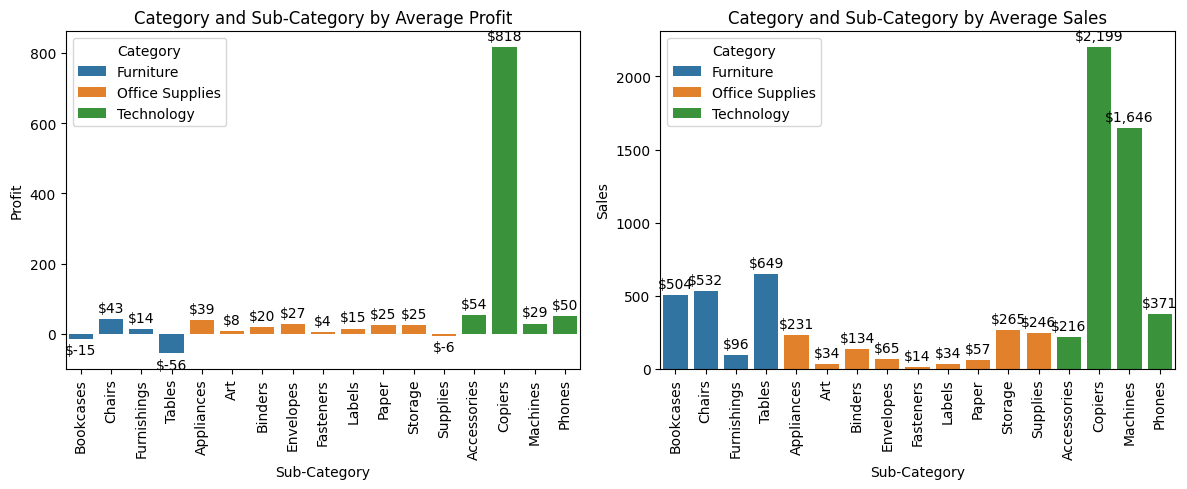

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True)
sns.barplot(
    data= subcategory_profit,
    x='Sub-Category',
    y='Profit',
    hue='Category',
    ax=axes[0]
)

sns.barplot(
    data= subcategory_sales,
    x='Sub-Category',
    y='Sales',
    hue='Category',
    ax=axes[1]
)

for container in axes[0].containers:
    labels = [value_currency(bar.get_height()) for bar in container]
    axes[0].bar_label(container, labels=labels, label_type='edge', padding=3)

for container in axes[1].containers:
    labels = [value_currency(bar.get_height()) for bar in container]
    axes[1].bar_label(container, labels=labels, label_type='edge', padding=3)

axes[0].set_title("Category and Sub-Category by Average Profit")
axes[0].tick_params(axis='x', rotation= 90)

axes[1].set_title("Category and Sub-Category by Average Sales")
axes[1].tick_params(axis='x', rotation = 90)
plt.tight_layout()
plt.show()

Furniture Sub-Category like tables or Bookcases make much sales but may the cost of making costs more that leads to a loss. that shows loss in profit <br>
Office supplies Sub-Category like supplies have similar approach like the latter.

In [141]:
top_products_sales = df.groupby(['Product Name', 'Sub-Category']).agg({'Sales': 'sum'}).reset_index().sort_values('Sales', ascending=False).head(10)
print(top_products_sales)

                                          Product Name Sub-Category      Sales
404              Canon imageCLASS 2200 Advanced Copier      Copiers  61599.824
650  Fellowes PB500 Electric Punch Plastic Comb Bin...      Binders  27453.384
444  Cisco TelePresence System EX90 Videoconferenci...     Machines  22638.480
786       HON 5400 Series Task Chairs for Big and Tall       Chairs  21870.576
686         GBC DocuBind TL300 Electric Binding System      Binders  19823.479
688   GBC Ibimaster 500 Manual ProClick Binding System      Binders  19024.500
805               Hewlett Packard LaserJet 3310 Copier      Copiers  18839.686
787  HP Designjet T520 Inkjet Large Format Printer ...     Machines  18374.895
683          GBC DocuBind P400 Electric Binding System      Binders  17965.068
813        High Speed Automatic Electric Letter Opener     Supplies  17030.312


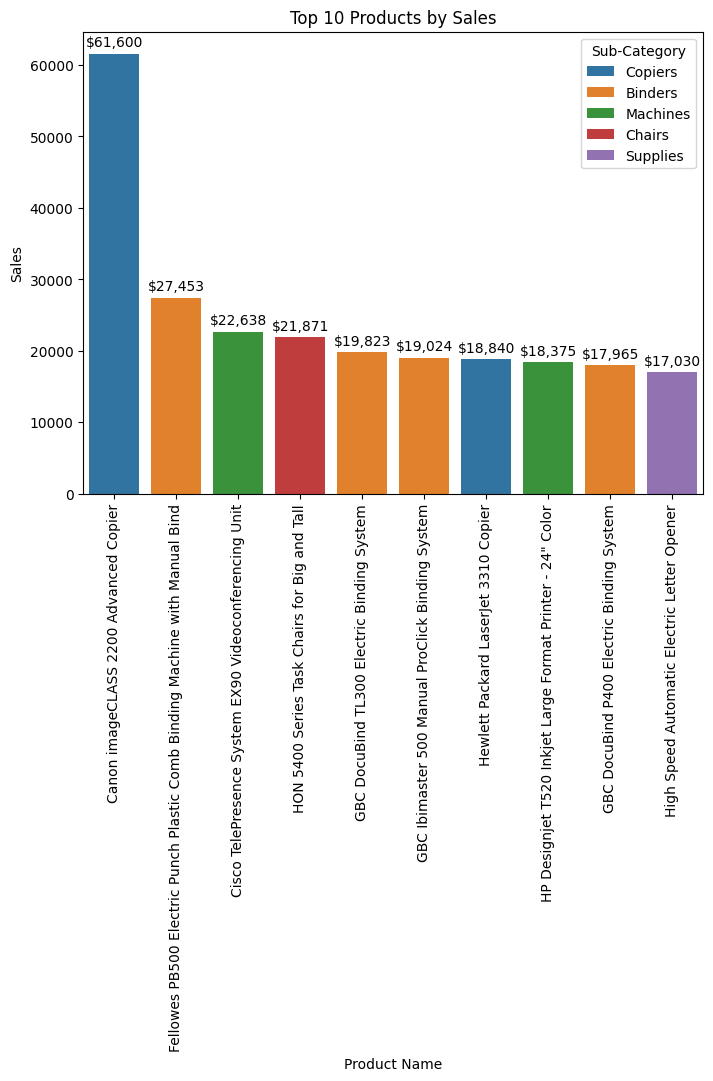

In [142]:
plt.figure(figsize=(8,6))

ax = sns.barplot(
    data=top_products_sales,
    x='Product Name',
    y='Sales',
    hue='Sub-Category'
)

for container in ax.containers:
    labels = [value_currency(bar.get_height()) for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding= 3)

plt.title("Top 10 Products by Sales")
plt.xticks(rotation=90)
plt.show()

looks like Canon imageCLASS 2200 Advanced Copier has most sales contribution in general and to office supplies specifically

In [143]:
top_products_profit = df.groupby(['Product Name', 'Sub-Category']).agg({'Profit': 'mean'}).reset_index().sort_values('Profit', ascending=False).head(10)
print(top_products_profit)

                                           Product Name Sub-Category  \
404               Canon imageCLASS 2200 Advanced Copier      Copiers   
405   Canon imageCLASS MF7460 Monochrome Digital Las...     Machines   
165                   Ativa V4110MDD Micro-Cut Shredder     Machines   
19     3D Systems Cube Printer, 2nd Generation, Magenta     Machines   
1840                  Zebra ZM400 Thermal Label Printer     Machines   
812   Hewlett-Packard Desktjet 6988DT Refurbished Pr...     Machines   
807   Hewlett-Packard Deskjet 3050a All-in-One Color...     Machines   
787   HP Designjet T520 Inkjet Large Format Printer ...     Machines   
400                  Canon PC1060 Personal Laser Copier      Copiers   
895                Ibico EPK-21 Electric Binding System      Binders   

           Profit  
404   5039.985600  
405   1995.990000  
165   1886.473050  
19    1858.985700  
1840  1671.768000  
812   1668.205000  
807   1459.200000  
787   1364.992200  
400   1142.733675  
895   1

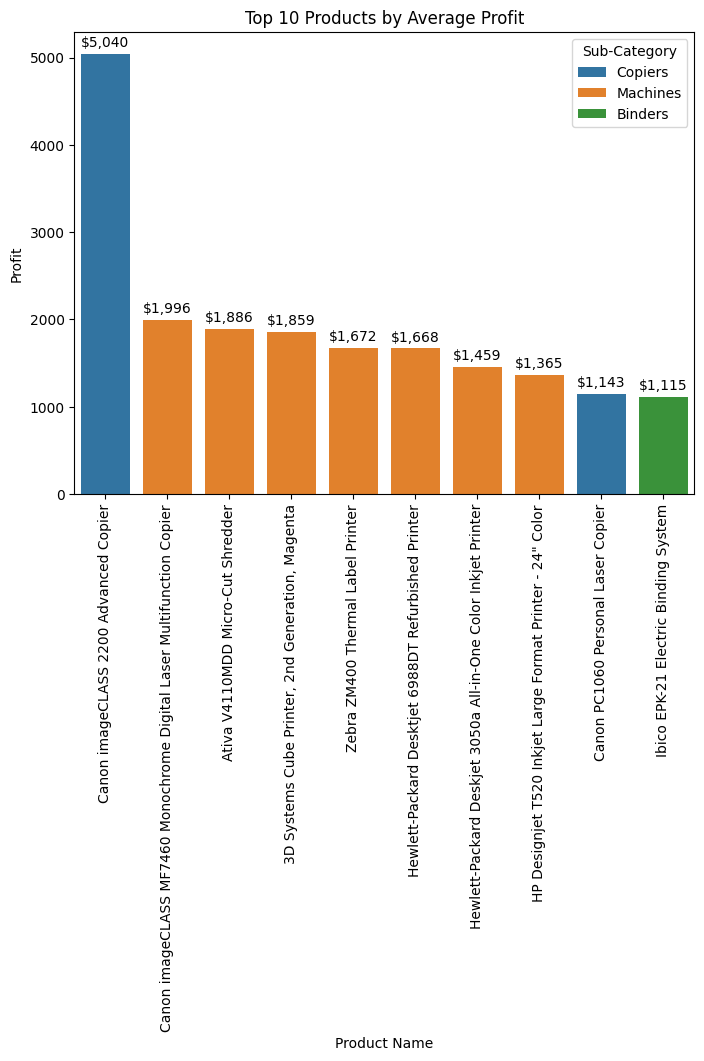

In [145]:
plt.figure(figsize=(8,6))

ax = sns.barplot(
    data=top_products_profit,
    x='Product Name',
    y='Profit',
    hue='Sub-Category'
)

for container in ax.containers:
    labels = [value_currency(bar.get_height()) for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding= 3)

plt.title("Top 10 Products by Average Profit")
plt.xticks(rotation=90)
plt.show()

Supplies products like High Speed Automatic Electric Letter Opener had relatively high sales in previous figure but does not contribute too much profit in top 10 profitable products

In [109]:
#top 20 cities by customers
top_cities_customer = df.groupby(['City']).size().sort_values(ascending=False).head(10).reset_index(name="no.of customers")
print(top_cities_customer)

            City  no.of customers
0  New York City              915
1    Los Angeles              747
2   Philadelphia              537
3  San Francisco              510
4        Seattle              428
5        Houston              377
6        Chicago              314
7       Columbus              222
8      San Diego              170
9    Springfield              163


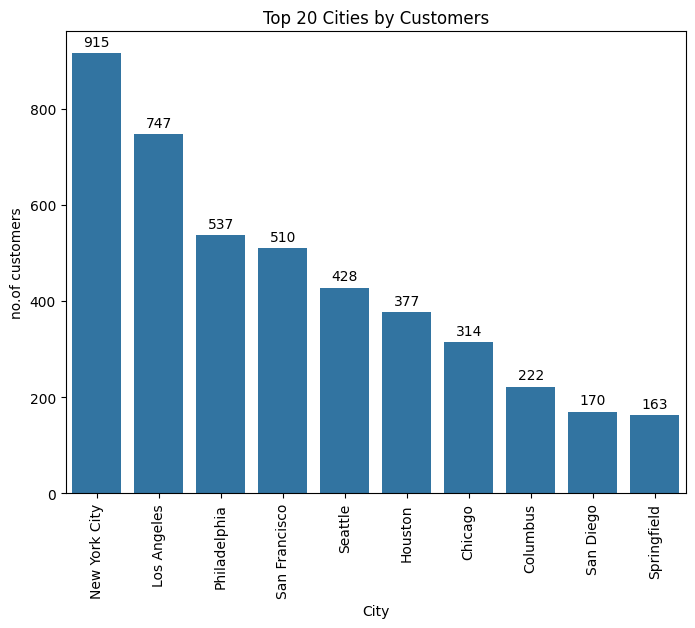

In [110]:
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=top_cities_customer,
    x='City',
    y='no.of customers'
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.f", label_type='edge', padding=3)

plt.title("Top 20 Cities by Customers")
plt.xticks(rotation = 90)
plt.show()

New york has the most customers

In [150]:
#top 10 cities by sales
top_cities_sales = df.groupby('City').agg({'Sales': 'sum'}).reset_index().sort_values('Sales',ascending=False).head(10)
print(top_cities_sales)

              City        Sales
329  New York City  256368.1610
266    Los Angeles  175851.3410
452        Seattle  119540.7420
438  San Francisco  112669.0920
374   Philadelphia  109077.0130
207        Houston   64504.7604
80         Chicago   48539.5410
437      San Diego   47521.0290
216   Jacksonville   44713.1830
464    Springfield   43054.3420


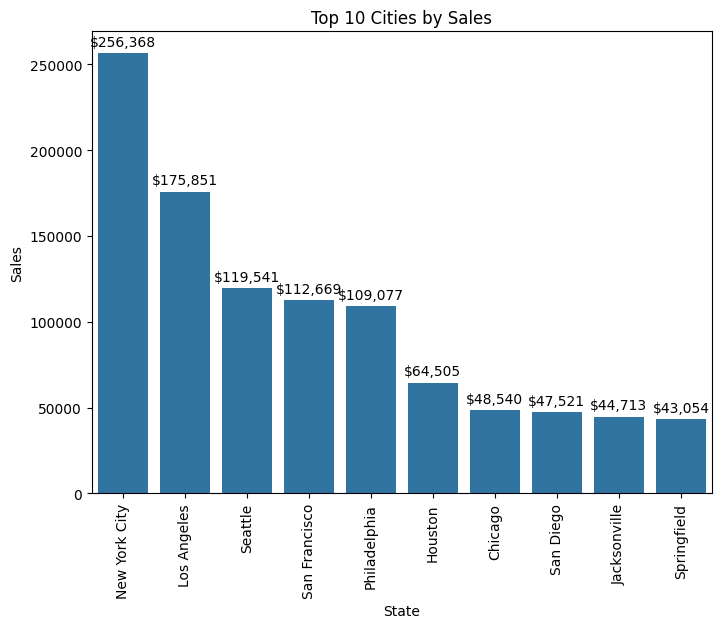

In [155]:
plt.figure(figsize=(8,6))

ax = sns.barplot(
    data=top_cities_sales,
    x='City',
    y='Sales'
)

for container in ax.containers:
    labels = [value_currency(bar.get_height()) for bar in container]
    ax.bar_label(container, labels= labels, label_type='edge', padding=3)


plt.title("Top 10 Cities by Sales")
plt.xlabel("State")
plt.xticks(rotation = 90)
plt.show()

New york has the most sales

In [157]:
#top 10 cities by Profit
top_cities_profit = df.groupby('City').agg({'Profit': 'mean'}).reset_index().sort_values('Profit',ascending=False).head(10)
print(top_cities_profit)

             City      Profit
217     Jamestown  642.885750
210  Independence  487.831500
233     Lafayette  323.173794
300   Minneapolis  296.721070
15       Appleton  277.383150
314    Morristown  262.603871
59        Burbank  254.844600
252          Lehi  225.831300
39        Beverly  218.306467
504       Warwick  212.759120


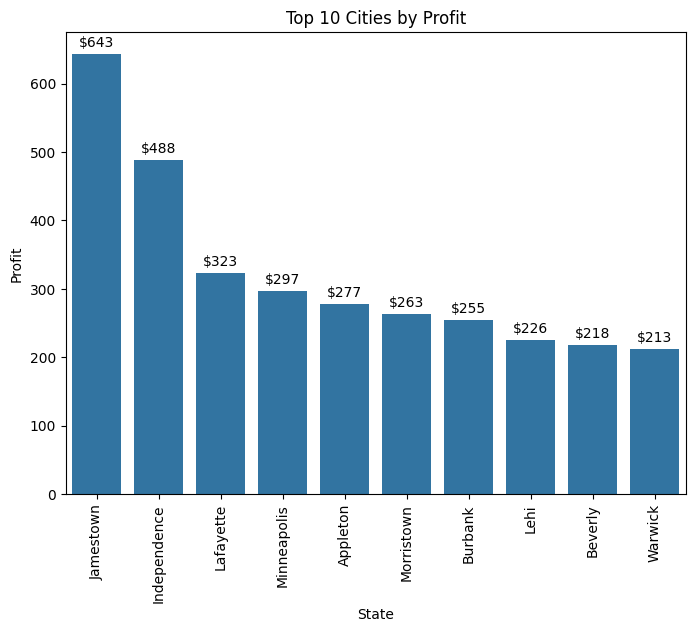

In [166]:
plt.figure(figsize=(8,6))

ax = sns.barplot(
    data=top_cities_profit,
    x='City',
    y='Profit'
)

for container in ax.containers:
    labels = [value_currency(bar.get_height()) for bar in container]
    ax.bar_label(container, labels= labels, label_type='edge', padding=3)


plt.title("Top 10 Cities by Profit")
plt.xlabel("State")
plt.xticks(rotation = 90)
plt.show()

on average jamestown has most profit while warwick is the lost

In [159]:
#top 10 states by sales
top_states_sales = df.groupby('State').agg({'Sales': 'sum'}).reset_index().sort_values('Sales',ascending=False).head(10)
print(top_states_sales)

           State        Sales
3     California  457687.6315
30      New York  310876.2710
41         Texas  170188.0458
45    Washington  138641.2700
36  Pennsylvania  116511.9140
8        Florida   89473.7080
11      Illinois   80166.1010
33          Ohio   78258.1360
20      Michigan   76269.6140
44      Virginia   70636.7200


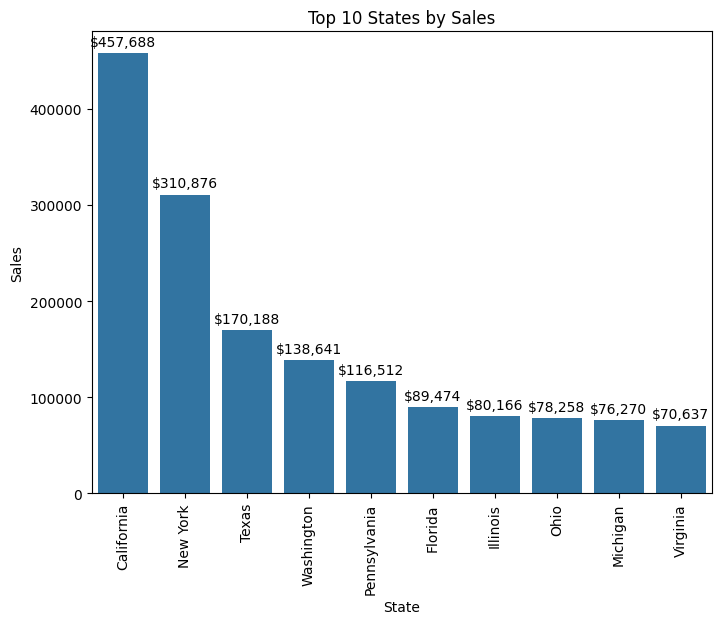

In [160]:
plt.figure(figsize=(8,6))

ax = sns.barplot(
    data=top_states_sales,
    x='State',
    y='Sales'
)

for container in ax.containers:
    labels = [value_currency(bar.get_height()) for bar in container]
    ax.bar_label(container, labels= labels, label_type='edge', padding=3)


plt.title("Top 10 States by Sales")
plt.xlabel("State")
plt.xticks(rotation = 90)
plt.show()

In [161]:
#top 10 states by Profit
top_states_profit = df.groupby('State').agg({'Profit': 'mean'}).reset_index().sort_values('Profit',ascending=False).head(10)
print(top_states_profit)

                   State      Profit
43               Vermont  204.088936
37          Rhode Island  130.100523
12               Indiana  123.375411
24               Montana  122.221900
21             Minnesota  121.608847
7   District of Columbia  105.958930
6               Delaware  103.930988
48               Wyoming  100.196000
23              Missouri   97.518341
20              Michigan   95.934069


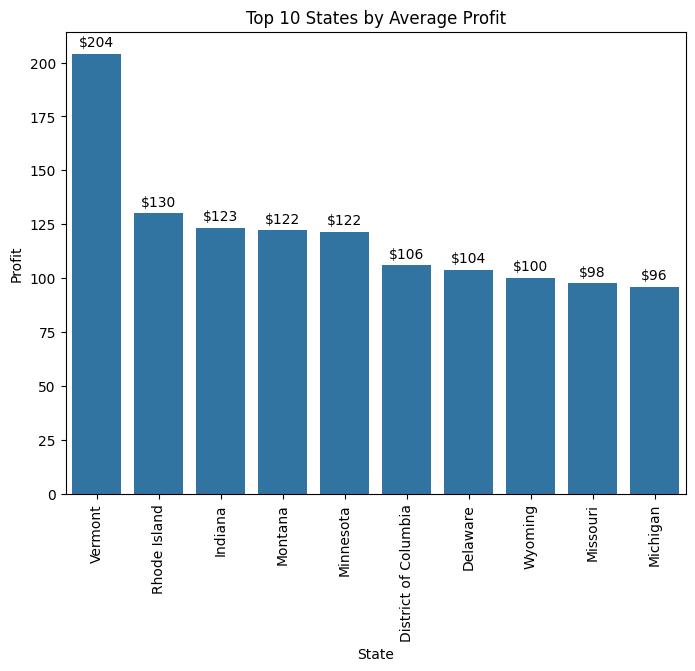

In [162]:
plt.figure(figsize=(8,6))

ax = sns.barplot(
    data=top_states_profit,
    x='State',
    y='Profit'
)

for container in ax.containers:
    labels = [value_currency(bar.get_height()) for bar in container]
    ax.bar_label(container, labels= labels, label_type='edge', padding=3)


plt.title("Top 10 States by Average Profit")
plt.xlabel("State")
plt.xticks(rotation = 90)
plt.show()

vermont has highest profit on average while michigan is the lowest

In [152]:
#which segment contributes more to sales / profit
segment_sales_profit = df.groupby('Segment').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()
segment_sales_profit_long = pd.melt(segment_sales_profit, id_vars= 'Segment', value_vars=['Sales', 'Profit'], var_name='Metric', value_name= 'Value')
print(segment_sales_profit_long)

       Segment  Metric       Value
0     Consumer   Sales  223.733644
1    Corporate   Sales  233.823300
2  Home Office   Sales  240.972041
3     Consumer  Profit   25.836873
4    Corporate  Profit   30.456667
5  Home Office  Profit   33.818664


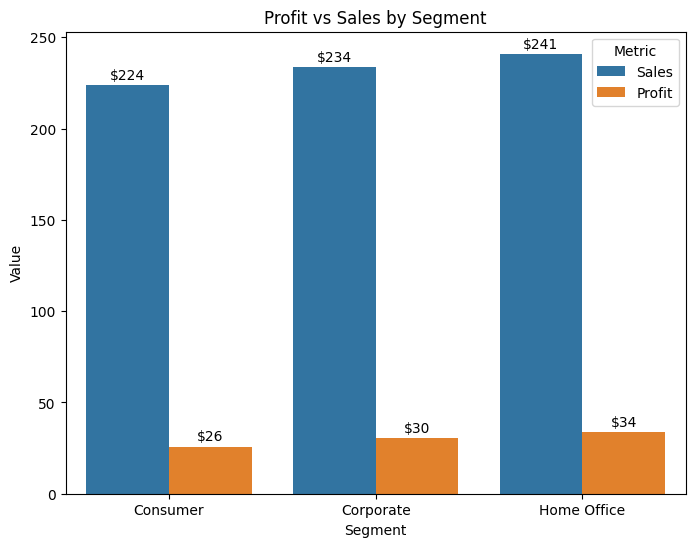

In [153]:
plt.figure(figsize=(8,6))

ax = sns.barplot(
    data=segment_sales_profit_long,
    x='Segment',
    y='Value',
    hue='Metric'
)

for container in ax.containers:
    labels = [value_currency(bar.get_height()) for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding= 2)

plt.title("Profit vs Sales by Segment")
plt.show()

Home office has most contribution to sales and profit on average

In [167]:
#top 10 customers_sales
top_10_customers_sales = df.groupby('Customer Name').agg({'Sales': 'sum'}).reset_index().sort_values('Sales', ascending=False).head(10)
print(top_10_customers_sales)

          Customer Name      Sales
686         Sean Miller  25043.050
730        Tamara Chand  19052.218
622        Raymond Buch  15117.339
757        Tom Ashbrook  14595.620
6         Adrian Barton  14473.571
441        Ken Lonsdale  14175.229
671        Sanjit Chand  14142.334
334        Hunter Lopez  12873.298
672        Sanjit Engle  12209.438
156  Christopher Conant  12129.072


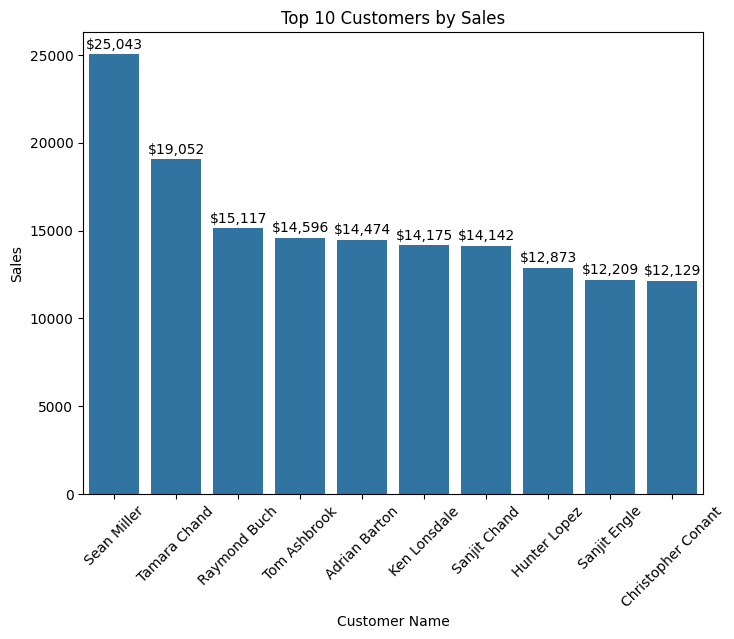

In [170]:
plt.figure(figsize=(8,6))

ax = sns.barplot(
    data= top_10_customers_sales,
    x= 'Customer Name',
    y='Sales'
)

for container in ax.containers:
    labels = [value_currency(bar.get_height()) for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding= 2)

plt.title("Top 10 Customers by Sales")
plt.xticks(rotation = 45)
plt.show()

Sean Miller has the highest Sales

In [173]:
#top 10 customers_avg_profit
top_10_customers_profit = df.groupby('Customer Name').agg({'Profit': 'mean'}).reset_index().sort_values('Profit', ascending=False).head(10)
print(top_10_customers_profit)

            Customer Name      Profit
730          Tamara Chand  748.443658
547      Mitch Willingham  555.172000
334          Hunter Lopez  511.129927
757          Tom Ashbrook  470.378830
157  Christopher Martinez  389.989040
622          Raymond Buch  387.560883
35            Andy Reiter  320.513422
90           Bill Shonely  290.673822
6           Adrian Barton  272.240275
671          Sanjit Chand  261.700541


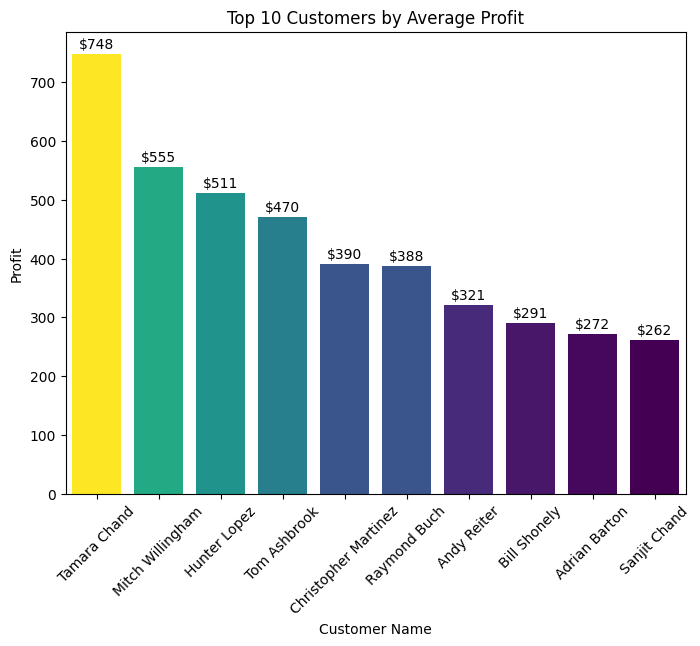

In [178]:
plt.figure(figsize=(8,6))

ax = sns.barplot(
    data= top_10_customers_profit,
    x= 'Customer Name',
    y='Profit'
)

profits = top_10_customers_profit['Profit'].values
norm = Normalize(vmin= profits.min(), vmax=profits.max() )
colors = cm.viridis(norm(profits))

for bar, color in zip(ax.patches, colors):
    bar.set_facecolor(color)

for container in ax.containers:
    labels = [value_currency(bar.get_height()) for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding= 2)

plt.title("Top 10 Customers by Average Profit")
plt.xticks(rotation = 45)
plt.show()

Tamara Chand has the second most sales but most average profit

In [182]:
#most states with discounts
top_states_with_discounts = df[df['Discount'] > 0].groupby('State')['Discount'].count().reset_index().sort_values('Discount', ascending=False).head(10)
print(top_states_with_discounts)

             State  Discount
23           Texas       985
1       California       741
20    Pennsylvania       587
7         Illinois       492
18            Ohio       469
5          Florida       383
16        New York       322
17  North Carolina       249
0          Arizona       224
22       Tennessee       183


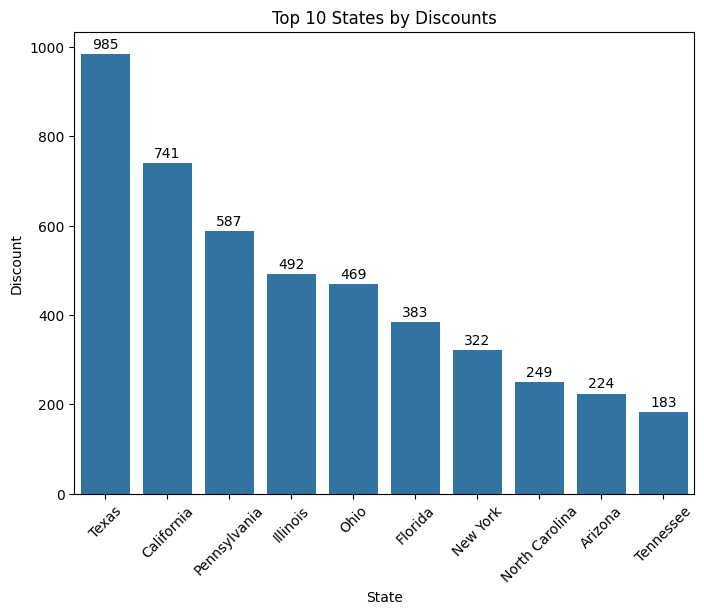

In [184]:
plt.figure(figsize=(8,6))

ax = sns.barplot(
    data= top_states_with_discounts,
    x= 'State',
    y='Discount'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%0.f', label_type='edge', padding= 2)

plt.title("Top 10 States by Discounts")
plt.xticks(rotation = 45)
plt.show()

Texas has the most discounts while New York has relatively low discounts compared to it's sales

In [202]:
#Discounts by ship mode
shipmode_discount = df[df['Discount'] > 0].groupby('Ship Mode')['Discount'].count().reset_index().sort_values('Discount', ascending=True)
print(shipmode_discount)

        Ship Mode  Discount
1        Same Day       285
0     First Class       839
2    Second Class       943
3  Standard Class      3129


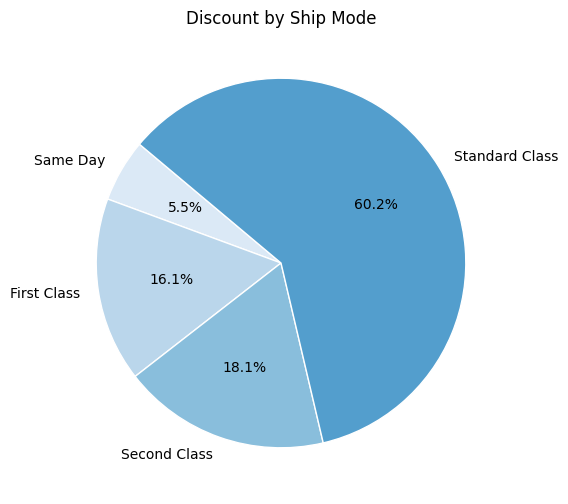

In [204]:
plt.figure(figsize=(8,6))

plt.pie(
    x= shipmode_discount['Discount'],
    labels= shipmode_discount['Ship Mode'],
    startangle=140,
    autopct='%1.1f%%',
    colors= sns.color_palette('Blues'),
    wedgeprops=dict(edgecolor= 'white')
)

plt.title("Discount by Ship Mode")
plt.show()

standard class shipment are likely to use discounts while same Day is the least

In [205]:
#Discounts by region
region_discount = df[df['Discount'] > 0].groupby('Region')['Discount'].count().reset_index().sort_values('Discount', ascending=True)
print(region_discount)

    Region  Discount
2    South       815
1     East      1399
3     West      1487
0  Central      1495


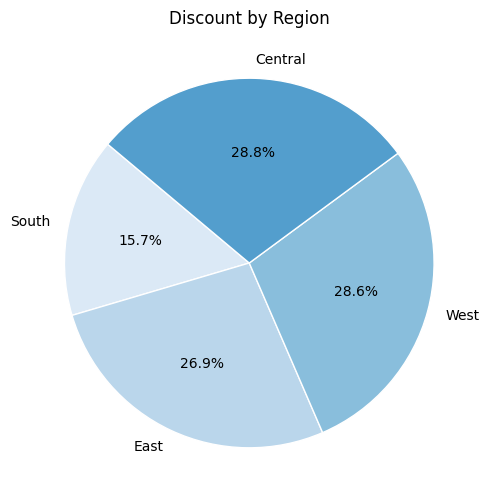

In [207]:
plt.figure(figsize=(8,6))

plt.pie(
    x= region_discount['Discount'],
    labels= region_discount['Region'],
    startangle=140,
    autopct='%1.1f%%',
    colors= sns.color_palette('Blues'),
    wedgeprops=dict(edgecolor= 'white')
)

plt.title("Discount by Region")
plt.show()

In [208]:
#Discounts by Segment
segment_discount = df[df['Discount'] > 0].groupby('Segment')['Discount'].count().reset_index().sort_values('Discount', ascending=True)
print(segment_discount)

       Segment  Discount
2  Home Office       873
1    Corporate      1593
0     Consumer      2730


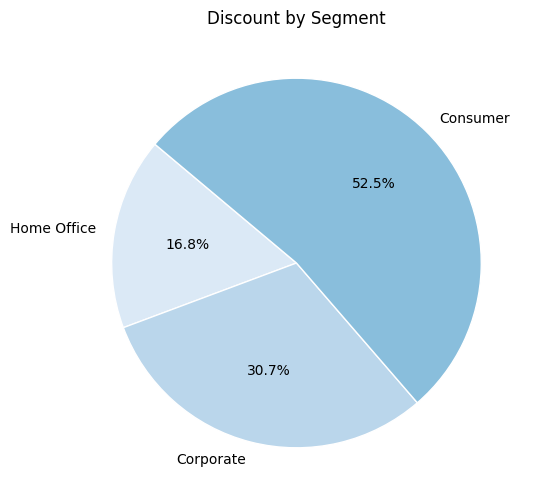

In [209]:
plt.figure(figsize=(8,6))

plt.pie(
    x= segment_discount['Discount'],
    labels= segment_discount['Segment'],
    startangle=140,
    autopct='%1.1f%%',
    colors= sns.color_palette('Blues'),
    wedgeprops=dict(edgecolor= 'white')
)

plt.title("Discount by Segment")
plt.show()

Consumer segment use much discounts

In [210]:
#how much loss
df['is_loss'] = df['Profit'] < 0
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,is_loss
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,False
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,False
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,False
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,True
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,False


In [216]:
loss = df['is_loss'].value_counts().reset_index()
print(loss)

   is_loss  count
0    False   8123
1     True   1871


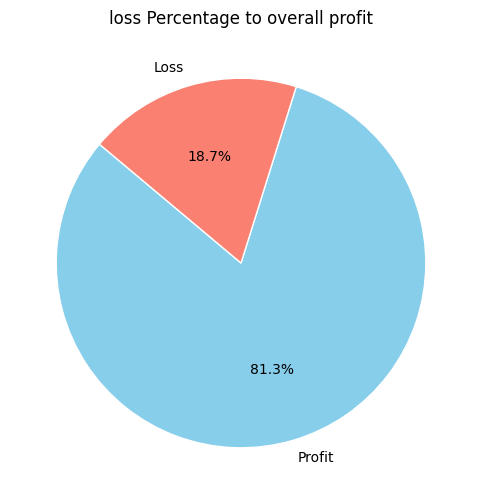

In [223]:
plt.figure(figsize=(8,6))

plt.pie(
    x= loss['count'],
    labels= loss['is_loss'].map({True: 'Loss', False: 'Profit'}),
    startangle=140,
    autopct='%1.1f%%',
    colors= ['skyblue', 'salmon'],
    wedgeprops=dict(edgecolor= 'white')
)

plt.title("loss Percentage to overall profit")
plt.show()

a lot of sales did not come with profit (like the tables of furniture category)